In [1]:
!pip install -r breed_requirements.txt

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.


In [2]:
!pip install cmake
!pip install dlib
!pip install imutils
!pip install opencv-contrib-python dlib
!pip install face_recognition

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 24.9 MB/s eta 0:00:0000:0100:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 31.8 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for dlib: filename=dlib-19.24.0-cp37-cp37m-linux_x86_64.whl size=4471182 sha256=437dc893e372b275d47deebbd85eb3ac7fdd338c35462120bf17fd05c2019a65
  Stored in directory: /home/user/.cache/pip/wheels/33/2f/fb/0a707a1693b1f823c9755fc23143d787fa75ee3561d56e2bc5
Successfully built dlib
You should consider upgrading via the '/usr/local/bin/python3.7 -m pip install --upgrade pip' command.
Defau

In [2]:
#GPU enable
import os
import tensorflow as tf
 
os.environ["CUDA_VISIBLE_DEVICES"]="0"
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        print(e)

In [3]:
#필요 library import
import os
import pandas as pd

import xml.etree.ElementTree as ET
#import gdown
import time
import math
import cv2
import numpy as np
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
import matplotlib.image as image
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.applications.xception import Xception, preprocess_input
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

from keras.utils import np_utils
from tensorflow.keras.utils import Sequence
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tf_explain.core.activations import ExtractActivations

from tensorflow.keras.applications.xception import decode_predictions
%matplotlib inline
from sklearn.metrics import classification_report

from PIL import Image
import matplotlib.image as mpimg
from imgaug import augmenters as iaa
print("Loaded all libraries")

Loaded all libraries


In [4]:
import dlib, cv2, os
from imutils import face_utils
import numpy as np
import matplotlib.pyplot as plt

In [5]:
import imutils
import face_recognition

In [15]:
!cmake --version

cmake version 3.10.2

CMake suite maintained and supported by Kitware (kitware.com/cmake).


In [5]:
import zipfile
zip_file = zipfile.ZipFile('./models.zip')
zip_file.extractall('./model')

In [6]:
detector = dlib.cnn_face_detection_model_v1('./model/models/dogHeadDetector.dat')
predictor = dlib.shape_predictor('./model/models/landmarkDetector.dat')

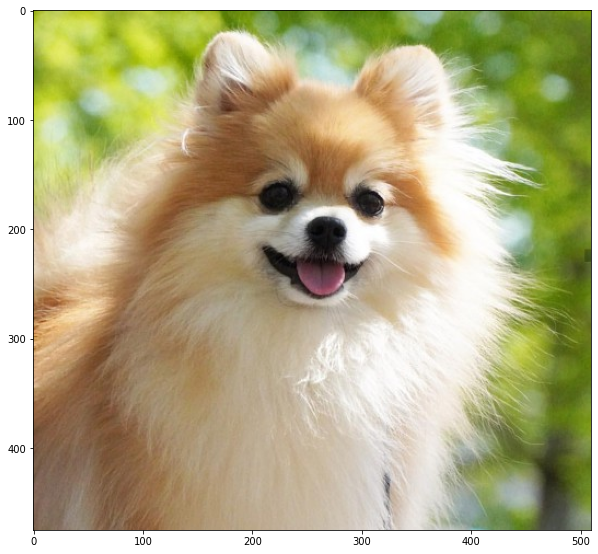

In [20]:
#img_path = './multi_data/input/Images/n6-Yorkshire_terrier/n02094433_2127.jpg'
img_path = './multi_data/data/n1-Pomeranian_long/pomee.jpg'
filename, ext = os.path.splitext(os.path.basename(img_path))
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (10,10))
plt.imshow(img)

mmod_rectangles[[(148, 99) (351, 303)]]
Detection 0: Left: 148 Top: 99 Right: 351 Bottom: 303 Confidence: 1.0381295680999756 


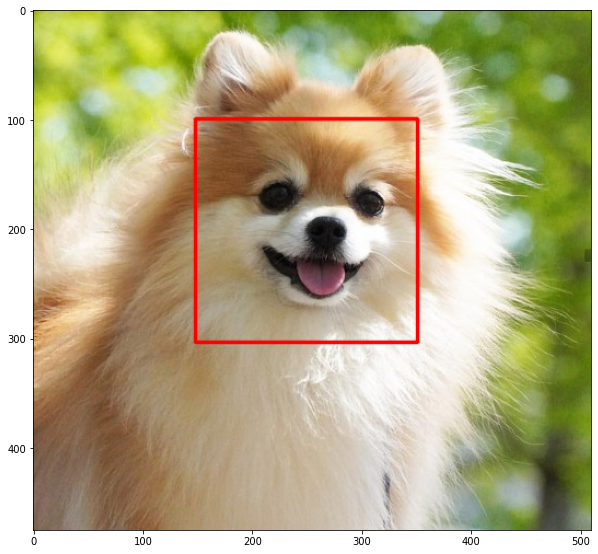

In [21]:
dets = detector(img, upsample_num_times=1)

#box 크기
print(dets)

img_result = img.copy()

for i, d in enumerate(dets):
    print("Detection {}: Left: {} Top: {} Right: {} Bottom: {} Confidence: {} "
         .format(i, d.rect.left(), d.rect.top(), d.rect.right(), d.rect.bottom(), d.confidence))
    
    x1, y1 = d.rect.left(), d.rect.top()
    x2, y2 = d.rect.right(), d.rect.bottom()
    
    cv2.rectangle(img_result, pt1=(x1, y1), pt2=(x2, y2), thickness=2, color=(255, 0, 0), lineType=cv2.LINE_AA)
    
plt.figure(figsize=(10, 10)) 
plt.imshow(img_result)    

[[267  76]
 [297  77]
 [307 176]
 [270 204]
 [232  71]
 [225 171]]


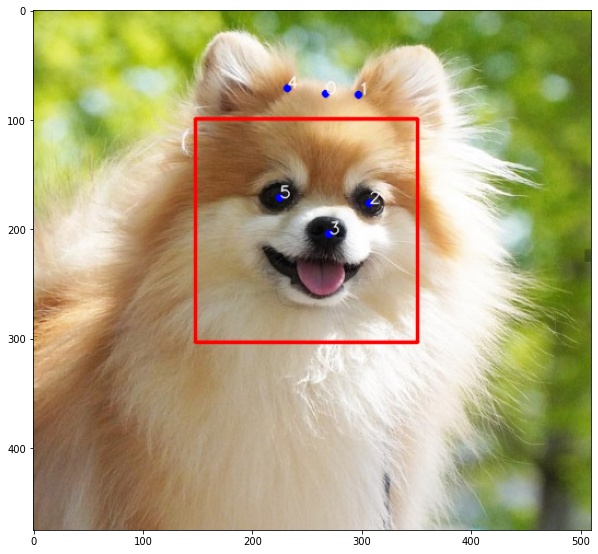

In [22]:
shapes = []
xy = np.empty((0,2), int)
for i, d in enumerate(dets):
    shape = predictor(img, d.rect)
    shpae = face_utils.shape_to_np(shape)
    
    for i, p in enumerate(shpae):
        shapes.append(shpae)
        cv2.circle(img_result, center = tuple(p), radius=3, color=(0, 0, 255), thickness=-1, lineType=cv2.LINE_AA)
        cv2.putText(img_result, str(i), tuple(p), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1, lineType=cv2.LINE_AA) 
        #xy = xy + tuple(p)
        xy = np.append(xy, np.array([p]), axis=0)
print(xy)
        
img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)
#cv2.imwrite('')
plt.figure(figsize=(10,10))
plt.imshow(img_result)

In [23]:
from sklearn.cluster import KMeans
from collections import Counter
clt = KMeans(n_clusters=2)

In [11]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()

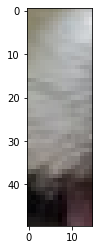

In [24]:
#포메, 요크셔, 퍼그
crop_image = img.copy()

#이마 부분(좌표 X:(5+0)/2 ~ (0+2)/2, Y:0~2)
crop_image2 = img[xy[0][1]:xy[2][1], int((xy[0][0]+xy[5][0])/2):int((xy[0][0]+xy[2][0])/2)]
#코 옆 부분(좌표 X:4~(5+3)/2, Y: (5+3)/2 ~ 5+2*(5-3))
crop_image3 = img[int((xy[5][1]+xy[3][1])/2):(xy[5][1]+2*(xy[3][1]-xy[5][1])), xy[4][0]:int((xy[5][0]+xy[3][0])/2)]
plt.imshow(crop_image)
plt.imshow(crop_image3)

In [26]:
def rgb_to_hex(r, g, b):
    r, g, b = int(r), int(g), int(b)
    return '#' + hex(r)[2:].zfill(2) + hex(g)[2:].zfill(2) + hex(b)[2:].zfill(2)

{0: 0.73, 1: 0.27}
[[161.2189781  160.63138686 156.78832117]
 [ 52.78712871  42.02475248  42.6039604 ]]
0


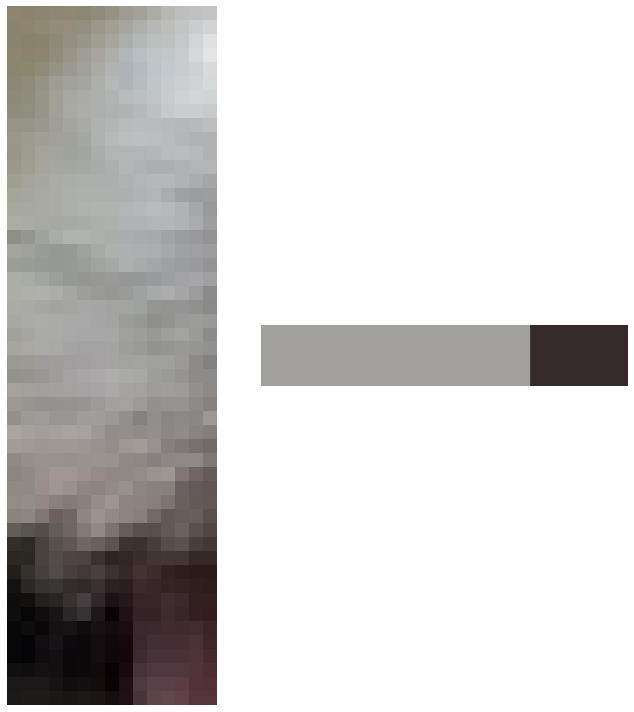

{0: 0.45, 1: 0.55}
[[219.30823786 181.62520458 130.17948718]
 [147.15747684 103.59064843  62.71989413]]
1


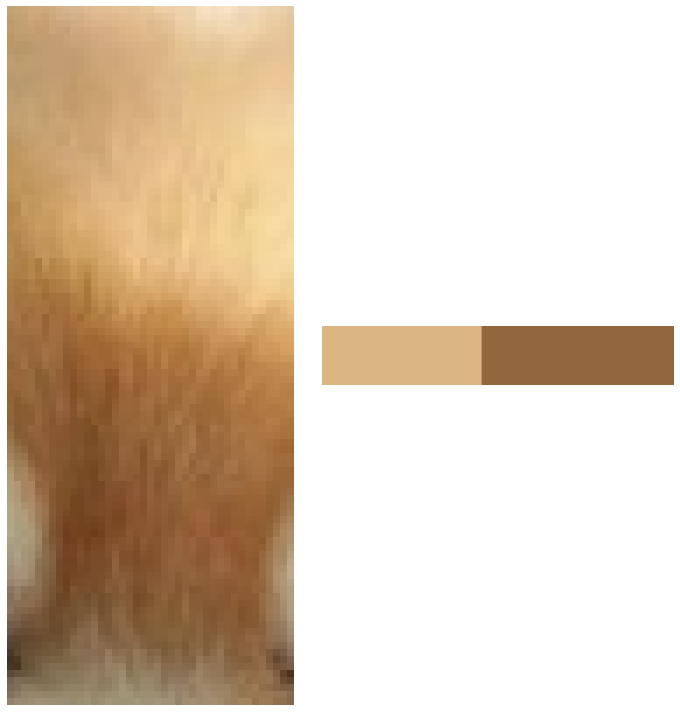

['#a1a09c', '#93673e']


In [27]:
rgb_hex = []
def palette_perc(k_cluster):
    width = 300
    palette = np.zeros((50, width, 3), np.uint8)
    
    n_pixels = len(k_cluster.labels_)
    counter = Counter(k_cluster.labels_) # count how many pixels per cluster
    perc = {}
    for i in counter:
        perc[i] = np.round(counter[i]/n_pixels, 2)
    perc = dict(sorted(perc.items()))
    
    #for logging purposes
    print(perc)
    print(k_cluster.cluster_centers_)
    
    if perc[0] > perc[1]:
        rgb_hex.append(rgb_to_hex(k_cluster.cluster_centers_[0][0],k_cluster.cluster_centers_[0][1], k_cluster.cluster_centers_[0][2]))
        print("0")
    else:
        rgb_hex.append(rgb_to_hex(k_cluster.cluster_centers_[1][0],k_cluster.cluster_centers_[1][1], k_cluster.cluster_centers_[1][2]))
        print("1")
    
    
    step = 0
    
    for idx, centers in enumerate(k_cluster.cluster_centers_): 
        palette[:, step:int(step + perc[idx]*width+1), :] = centers
        step += int(perc[idx]*width+1)
        
    return palette
    
clt_1 = clt.fit(crop_image3.reshape(-1, 3))
show_img_compar(crop_image3, palette_perc(clt_1))

clt_2 = clt.fit(crop_image2.reshape(-1, 3))
show_img_compar(crop_image2, palette_perc(clt_2))
print(rgb_hex)